In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

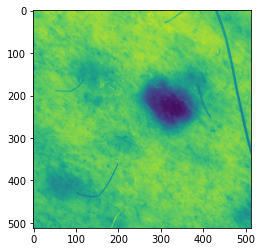

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

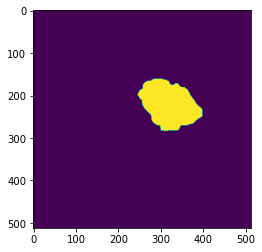

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpx9iaem4nkuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpx9iaem4nkuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 5

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 37s 682ms/step - loss: 0.5543 - dice_coeff: 0.3029 - val_loss: 0.5285 - val_dice_coeff: 0.3210
Epoch 2/100
39/39 [==============================] - 19s 483ms/step - loss: 0.4748 - dice_coeff: 0.3716 - val_loss: 0.5164 - val_dice_coeff: 0.4246
Epoch 3/100
39/39 [==============================] - 19s 483ms/step - loss: 0.4555 - dice_coeff: 0.4464 - val_loss: 0.4966 - val_dice_coeff: 0.4503
Epoch 4/100
39/39 [==============================] - 19s 482ms/step - loss: 0.4193 - dice_coeff: 0.5159 - val_loss: 0.4271 - val_dice_coeff: 0.5103
Epoch 5/100
39/39 [==============================] - 19s 494ms/step - loss: 0.4017 - dice_coeff: 0.5336 - val_loss: 0.3803 - val_dice_coeff: 0.5701
Epoch 6/100
39/39 [==============================] - 19s 486ms/step - loss: 0.3715 - dice_coeff: 0.5701 - val_loss: 0.3662 - val_dice_coeff: 0.5958
Epoch 7/100
39/39 [==============================] - 19s 484ms/step - loss: 0.3641 - dice_coeff: 0.58

24/24 [==============================] - 1s 42ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 349 machine labels.
Replacing 116 from 349 !
D_relabeled_ 116
point ids 116
Removed: 116 Filled: 116
TOOK 294.82320857048035 seconds
***
RUN: 4
Epoch 1/100
68/68 [==============================] - 32s 473ms/step - loss: 0.2660 - dice_coeff: 0.7221 - val_loss: 0.2949 - val_dice_coeff: 0.6878
Epoch 2/100
68/68 [==============================] - 27s 392ms/step - loss: 0.2667 - dice_coeff: 0.7122 - val_loss: 0.2544 - val_dice_coeff: 0.7397
Epoch 3/100
68/68 [==============================] - 27s 394ms/step - loss: 0.2538 - dice_coeff: 0.7285 - val_loss: 0.2598 - val_dice_coeff: 0.7282
Epoch 4/100
68/68 [==============================] - 27s 392ms/step - loss: 0.2585 - dice_coeff: 0.7243 - val_loss: 0.2684 - val_dice_coeff: 0.7310
Epoch 5/100
68/68 [==============================] - 27s 394ms/step - loss: 0.2702 - dice_coeff: 0.7118 - val_loss: 0.2627 - val_dice_coeff: 0.7388
Model saved to: /t

In [17]:
R.classifier_scores # after 5 runs of GP2

[[0.4271085560321808, 0.5856229066848755],
 [0.3270714581012726, 0.6793297529220581],
 [0.29766395688056946, 0.6988517642021179],
 [0.2759740352630615, 0.7103794813156128],
 [0.29101863503456116, 0.7261542081832886]]

In [18]:
R.discriminator_scores # after 5 runs of GP2

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

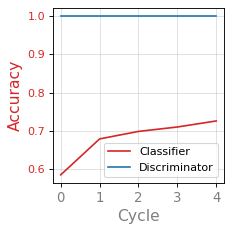

In [19]:
R.plot() # after 5 runs of GP2

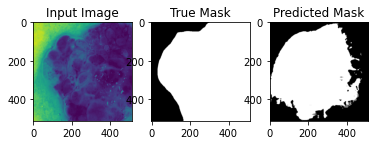

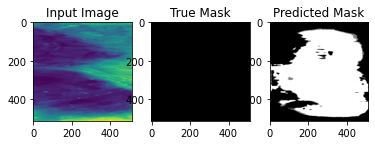

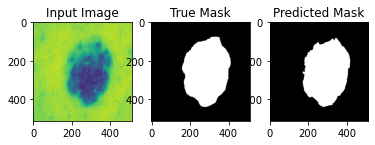

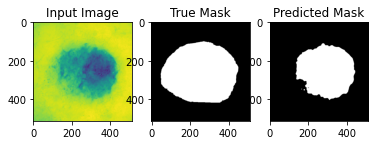

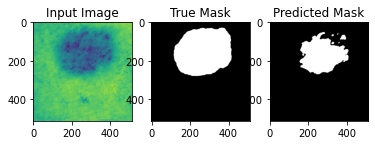

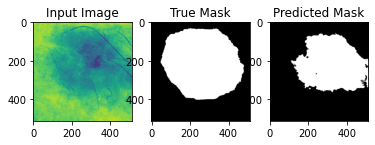

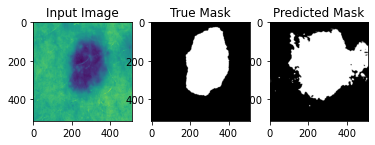

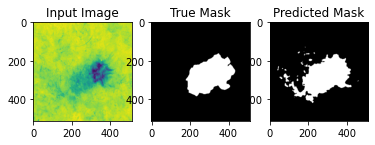

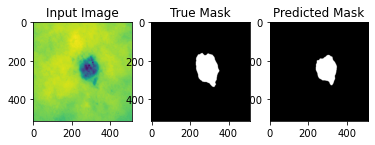

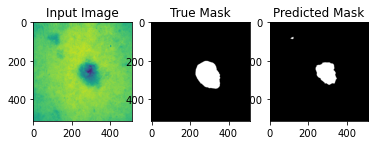

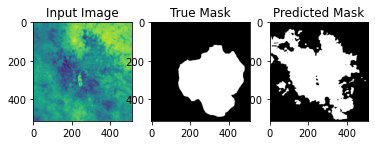

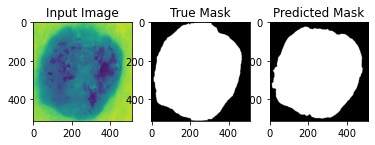

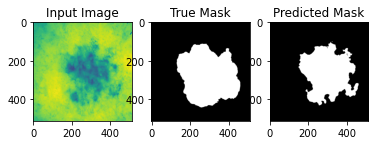

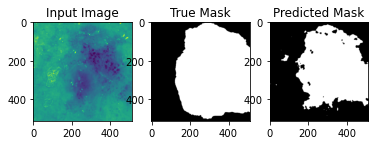

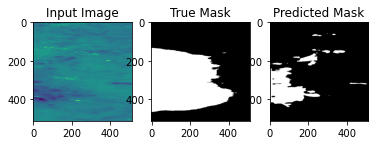

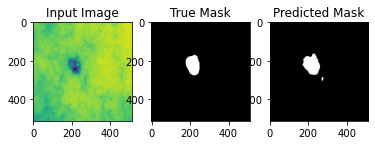

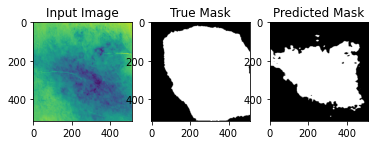

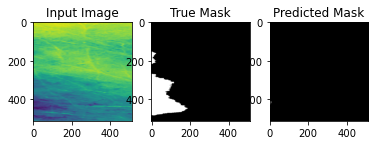

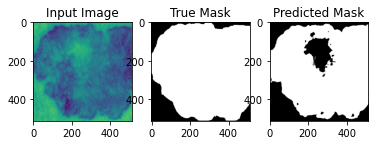

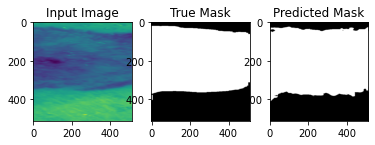

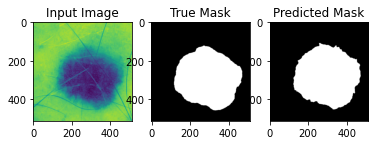

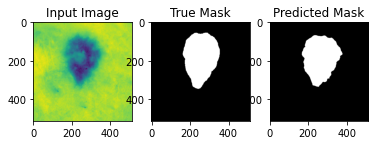

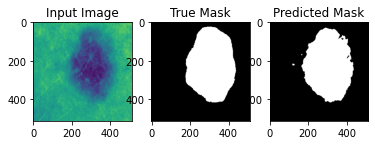

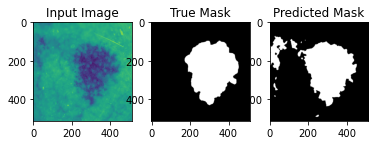

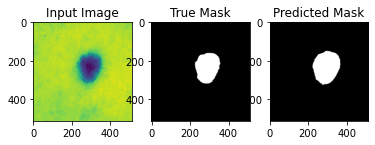

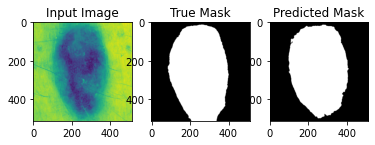

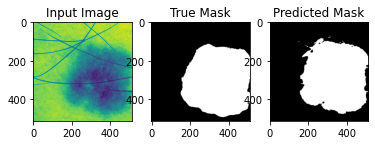

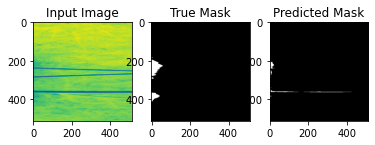

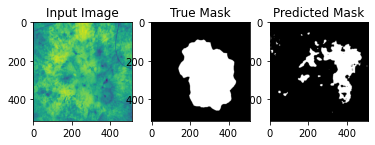

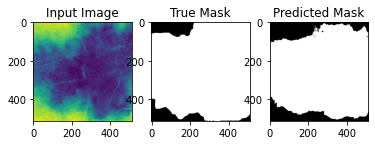

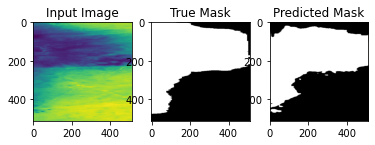

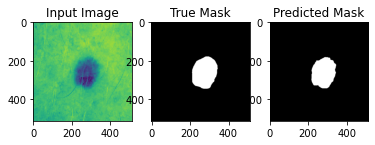

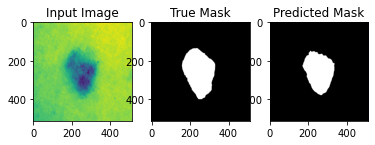

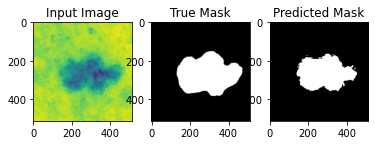

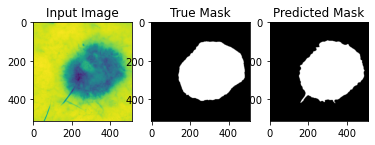

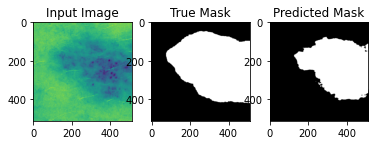

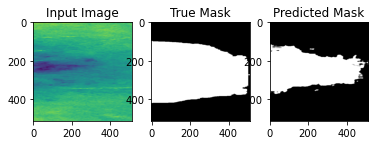

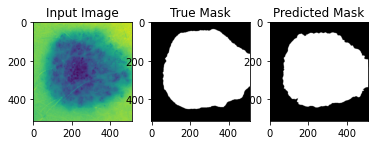

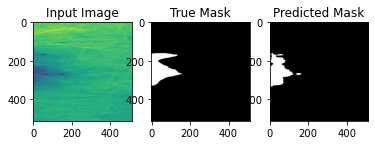

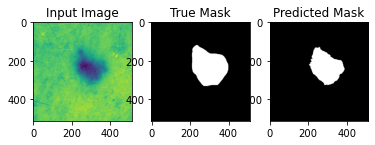

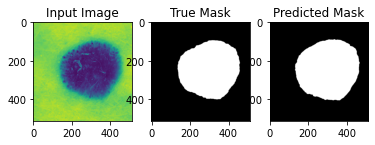

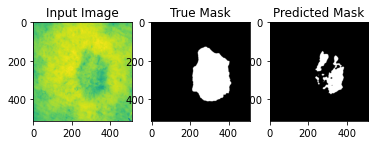

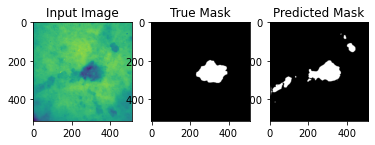

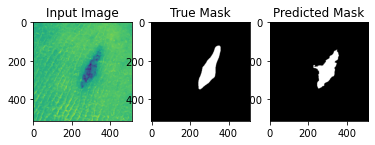

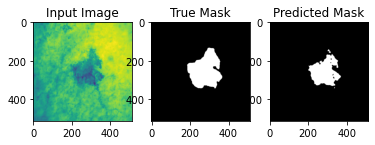

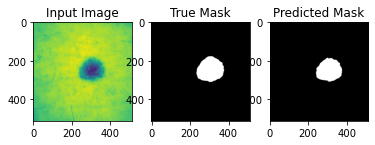

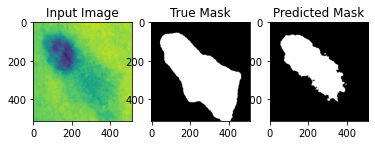

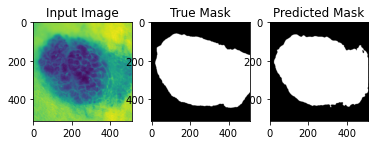

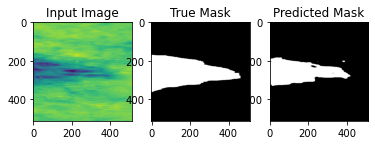

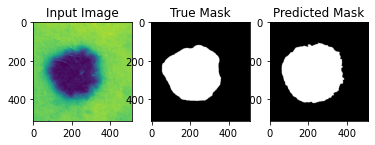

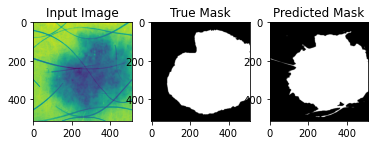

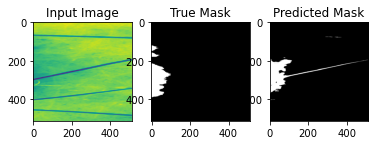

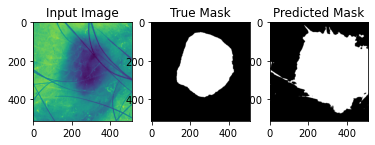

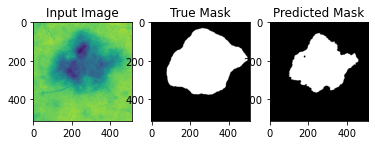

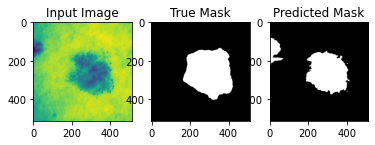

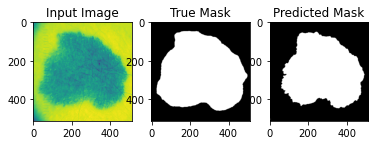

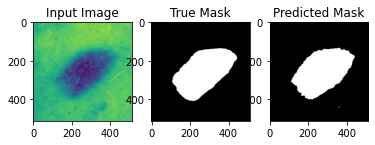

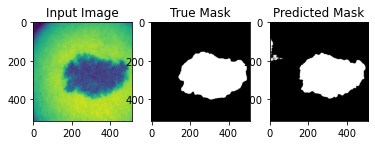

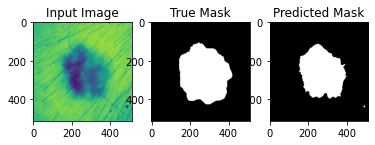

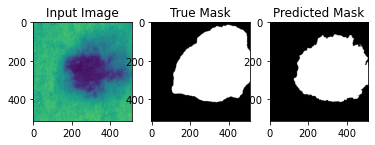

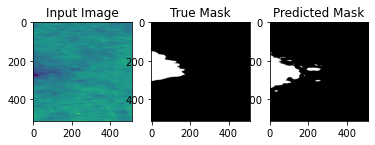

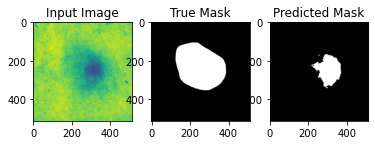

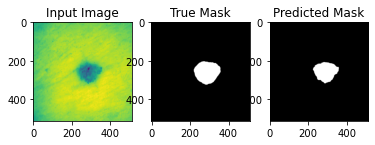

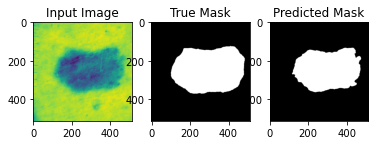

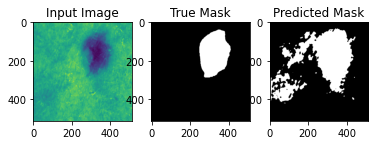

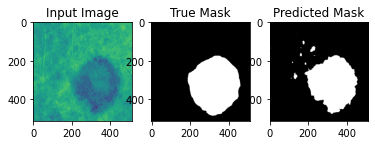

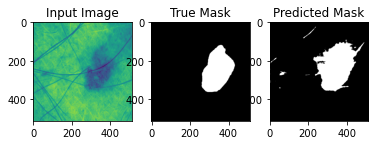

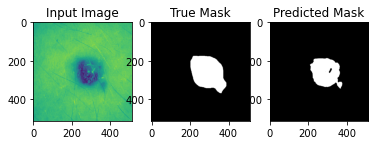

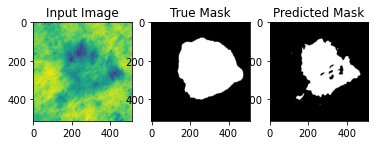

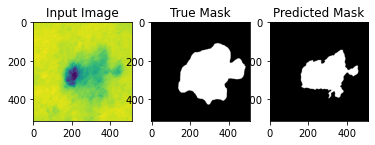

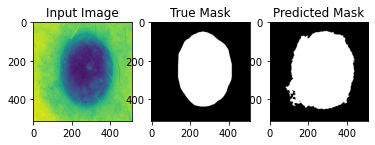

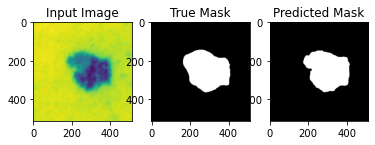

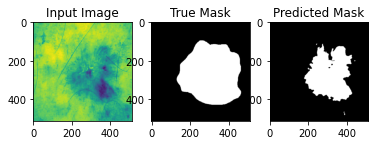

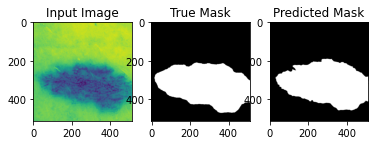

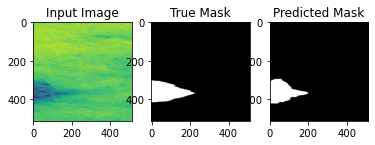

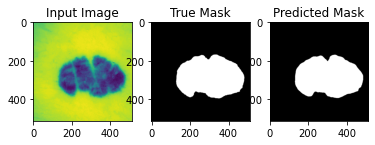

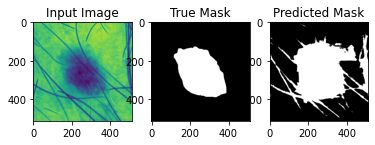

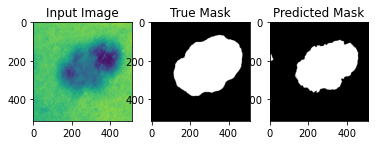

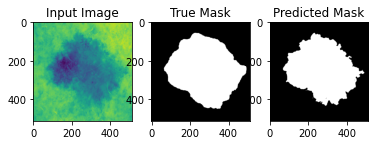

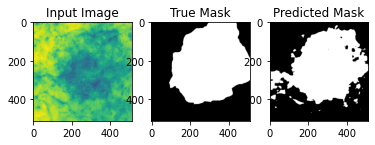

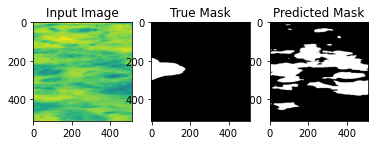

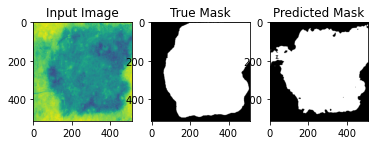

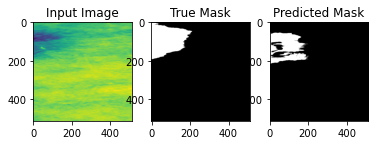

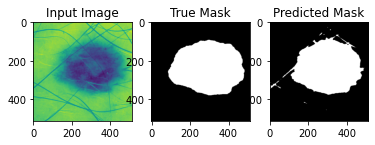

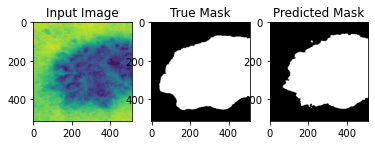

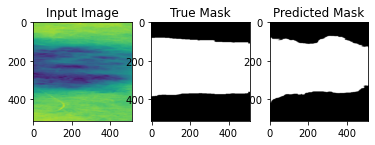

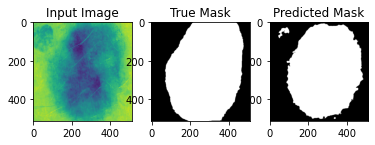

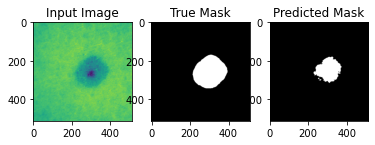

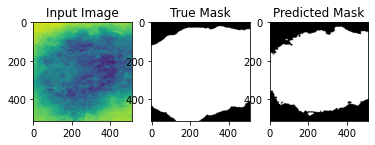

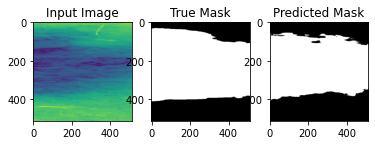

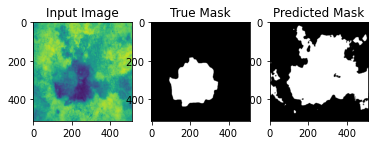

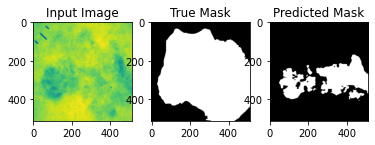

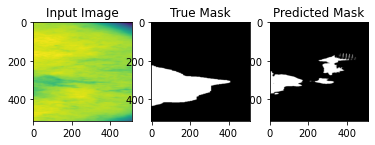

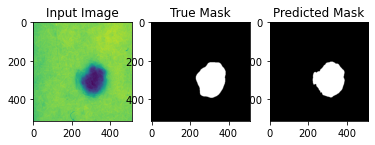

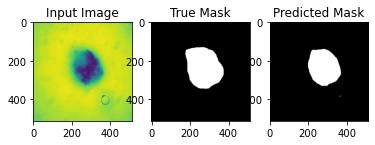

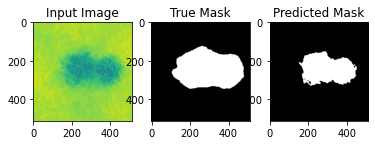

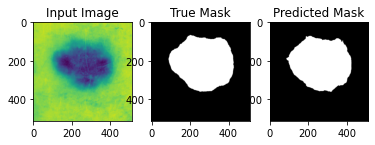

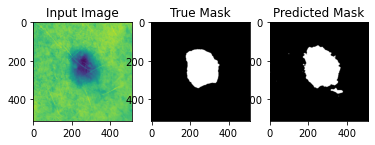

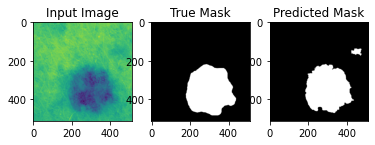

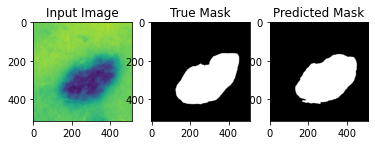

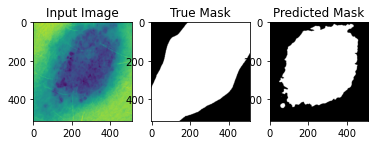

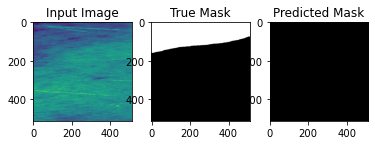

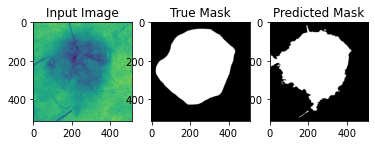

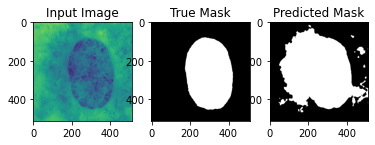

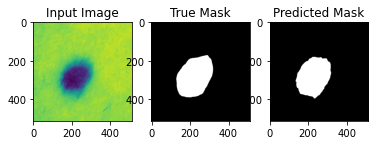

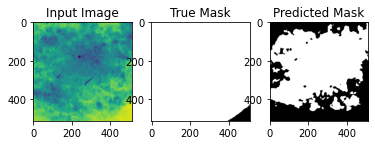

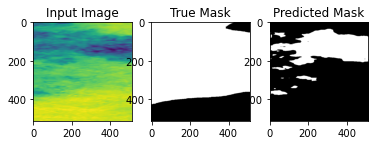

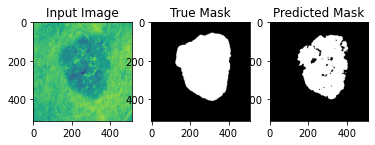

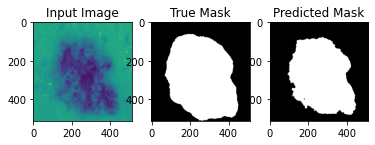

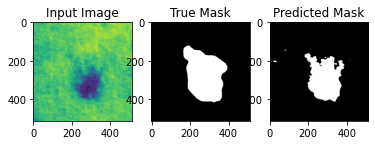

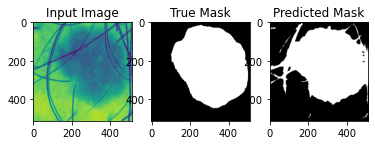

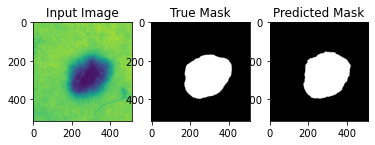

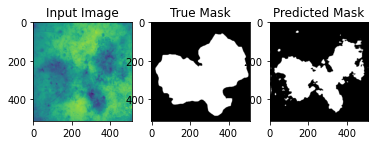

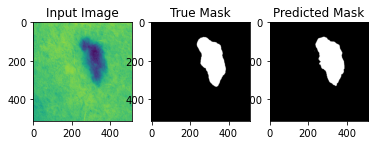

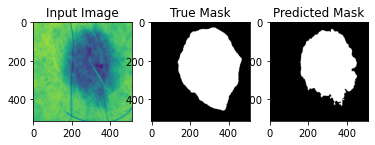

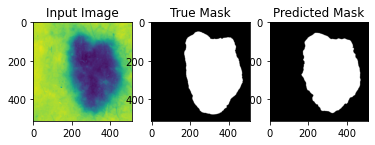

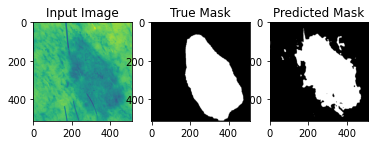

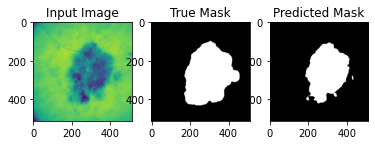

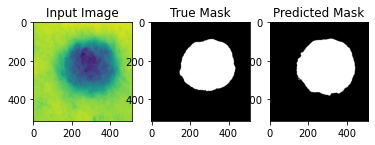

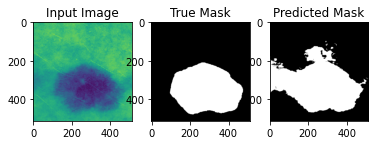

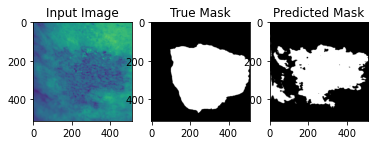

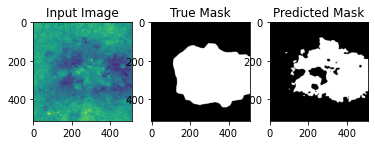

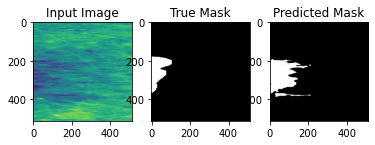

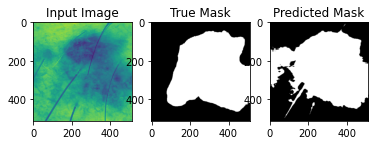

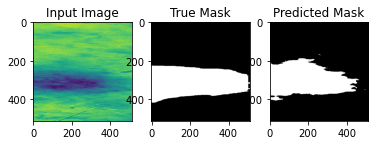

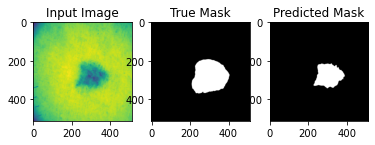

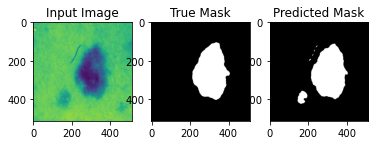

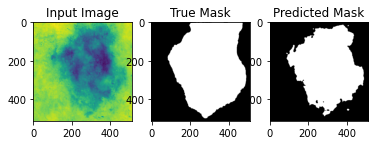

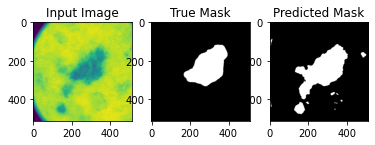

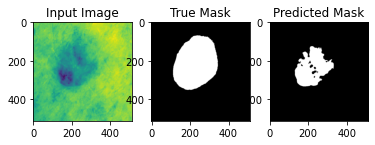

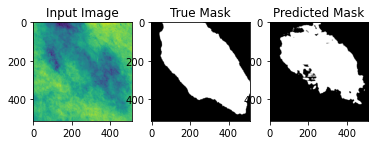

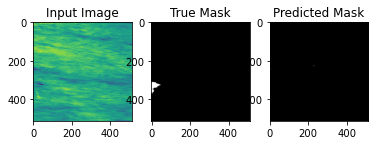

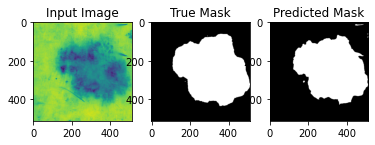

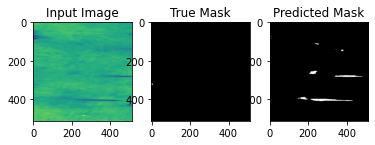

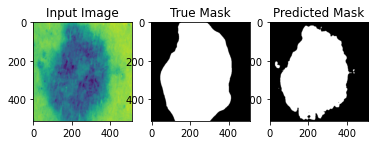

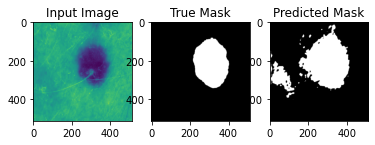

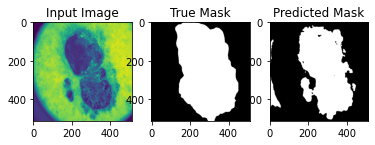

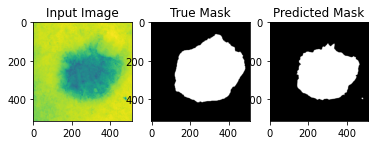

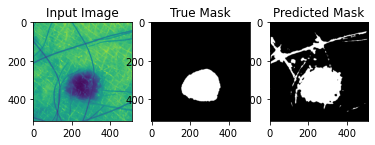

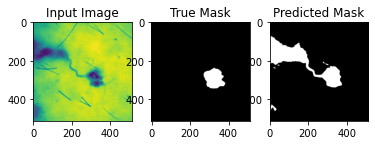

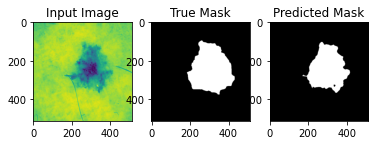

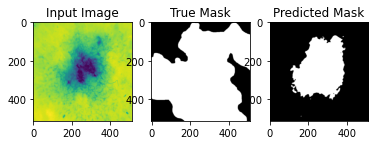

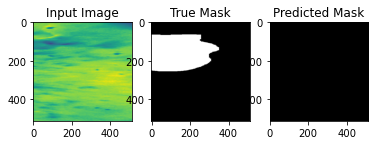

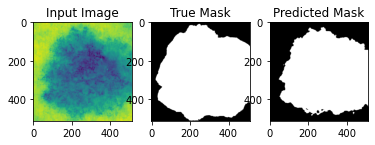

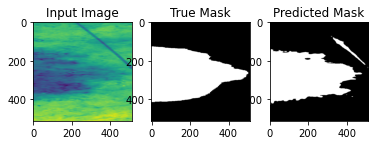

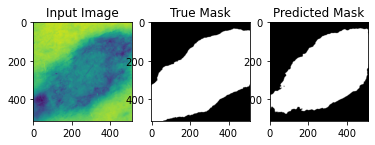

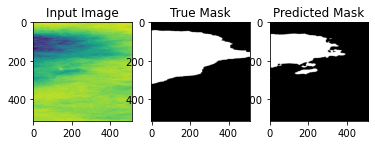

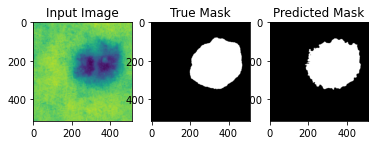

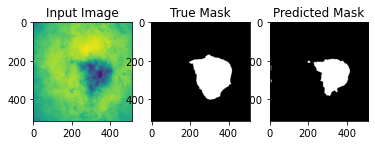

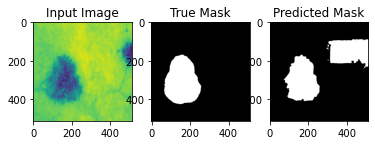

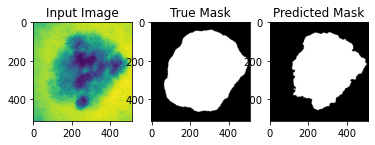

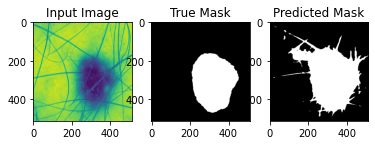

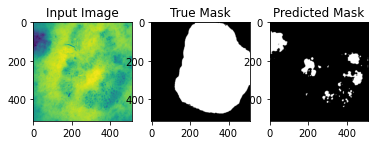

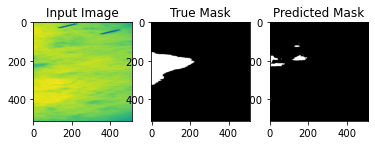

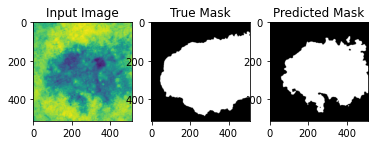

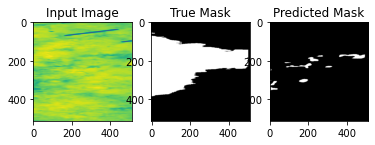

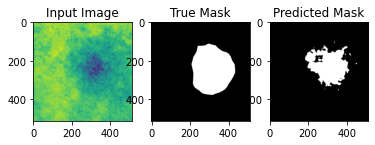

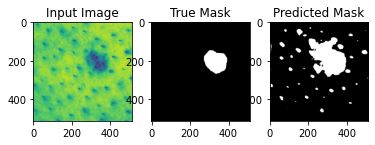

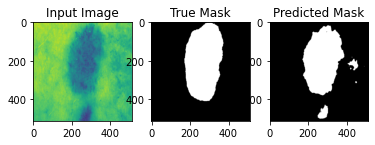

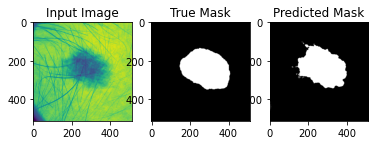

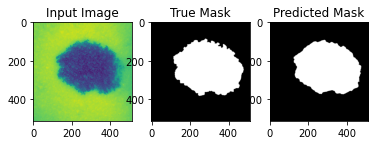

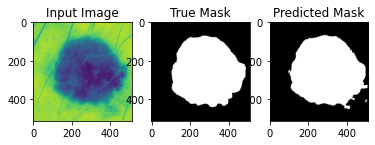

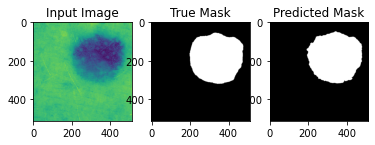

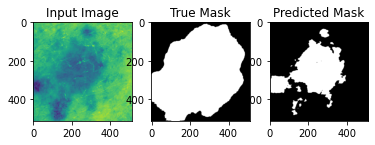

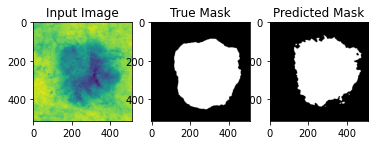

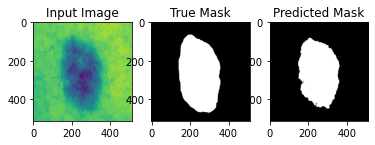

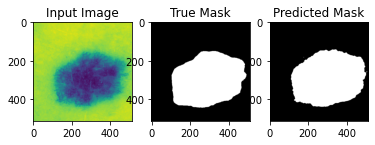

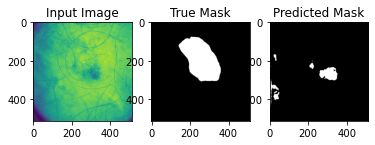

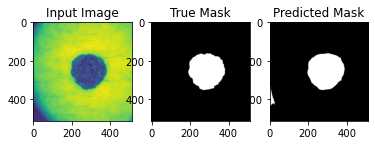

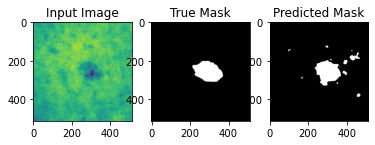

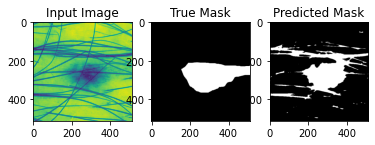

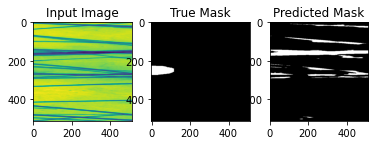

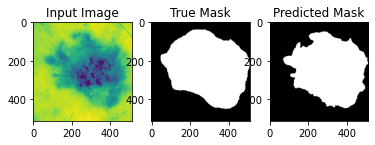

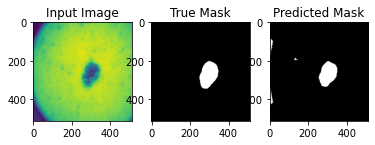

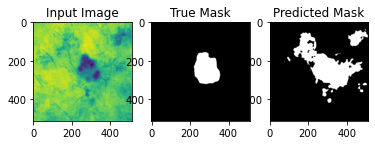

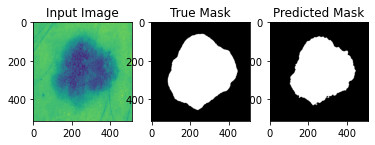

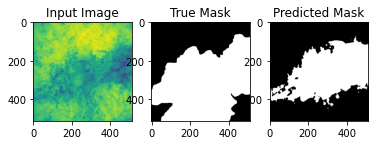

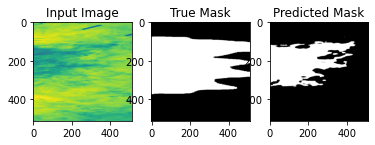

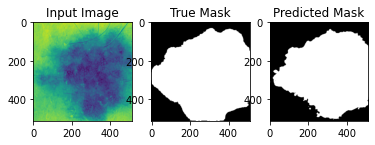

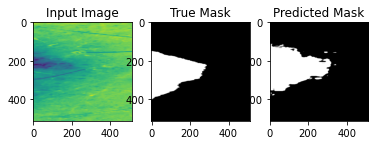

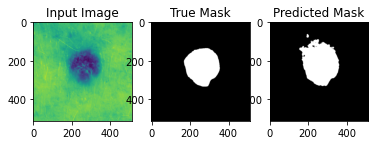

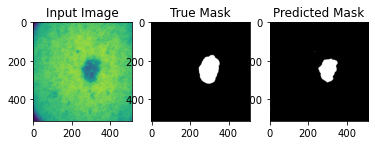

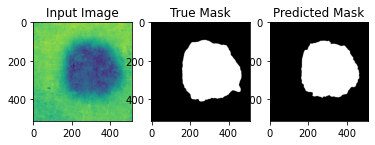

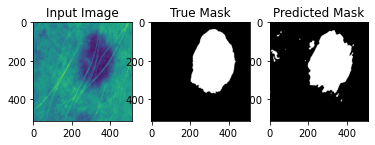

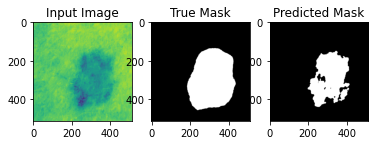

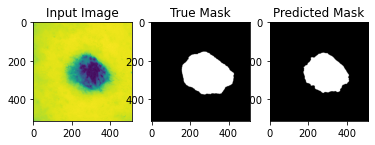

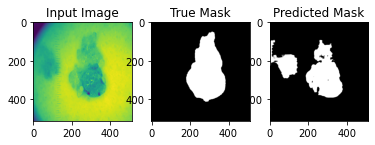

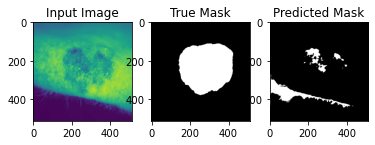

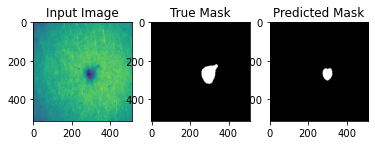

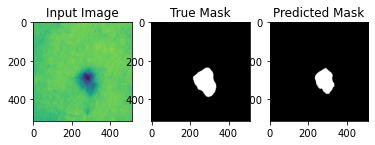

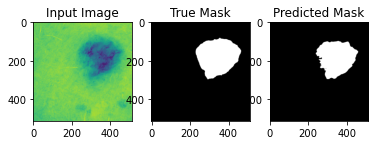

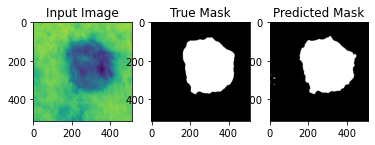

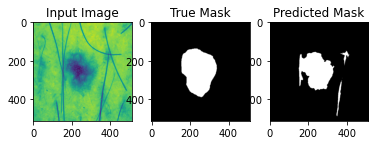

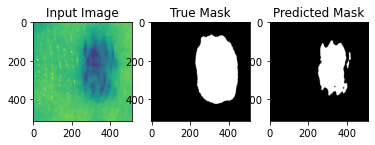

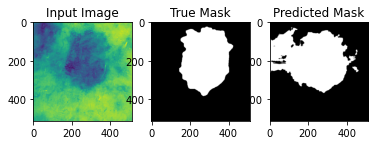

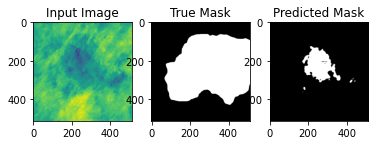

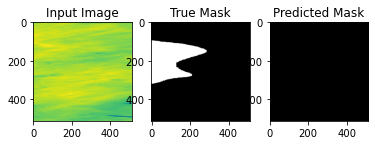

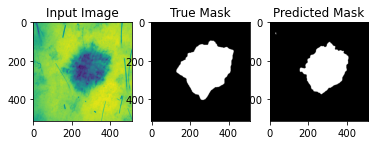

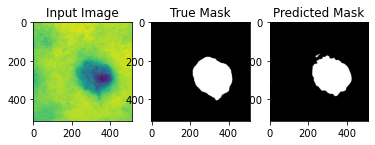

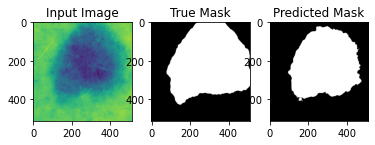

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=200) # after 5 runs of GP2